# Bot classifier

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn import model_selection, linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   

import missingno as msno

In [22]:
full = pd.read_csv('data/full/train.csv')

In [23]:
full.columns

Index(['avg_fav', 'avg_hash', 'avg_len', 'avg_ret', 'contributors_enabled',
       'created_at', 'default_profile', 'default_profile_image', 'description',
       'fake_words_score', 'favourites_count', 'follow_request_sent',
       'followers_count', 'following', 'freq', 'friends_count',
       'genuine_words_score', 'geo_enabled', 'is_translator', 'lang',
       'listed_count', 'location', 'max_fav', 'max_hash', 'max_len', 'max_ret',
       'media_perc', 'min_fav', 'min_hash', 'min_len', 'min_ret', 'name',
       'notifications', 'porn_words_score', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_image_url',
       'profile_image_url_https', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'prop_words_score', 'protected', 'quote_perc', 'ret_perc',
       'screen_name', 'spam_wo

## Data exploration

In [24]:
full.describe()

,avg_fav,avg_hash,avg_len,avg_ret,contributors_enabled,default_profile,default_profile_image,fake_words_score,favourites_count,follow_request_sent,...,ret_perc,spam_words_score,statuses_count,target,tweet_intradistance,url_intradistance,url_perc,user_id,utc_offset,verified
count,25106.000000,25106.000000,25106.000000,25106.000000,18281.0,22347.000000,18300.00000,25106.000000,25106.000000,18281.0,...,25106.000000,25106.000000,2.510600e+04,25106.000000,25106.000000,25106.000000,25106.000000,2.510600e+04,2810.000000,18292.000000
mean,6.701853,0.187896,56.958004,1480.894377,0.0,0.705956,0.04918,0.023929,5426.449892,0.0,...,0.233694,0.030912,1.073895e+04,1.877639,7.452426,1.922121,0.131263,1.637649e+17,-4889.145907,0.004702
std,462.762199,0.486488,52.017380,5434.678244,0.0,0.455622,0.21625,0.064130,25509.292286,0.0,...,0.350675,0.050025,4.146505e+04,1.427447,6.070453,2.619371,0.233282,3.576332e+17,22037.451204,0.068408
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.780330e+05,-39600.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,...,0.000000,0.000000,2.100000e+01,0.000000,0.000000,0.000000,0.000000,3.985294e+08,-25200.000000,0.000000
50%,0.000000,0.040000,66.260000,0.040000,0.0,1.000000,0.00000,0.013060,70.000000,0.0,...,0.000000,0.014325,8.800000e+01,2.000000,10.614713,0.000000,0.000000,1.355739e+09,-14400.000000,0.000000
75%,0.090909,0.200000,91.000000,655.678750,0.0,1.000000,0.00000,0.026143,439.000000,0.0,...,0.468201,0.043146,2.585000e+03,3.000000,12.107880,3.394820,0.166667,2.811347e+09,13500.000000,0.000000
max,71540.120000,17.000000,308.000000,247147.066667,0.0,1.000000,1.00000,1.855191,913239.000000,0.0,...,1.000000,0.898990,1.418488e+06,4.000000,27.574898,10.090432,1.000000,1.036369e+18,46800.000000,1.000000


Delete naive features 

In [25]:
full = full.drop(columns=['contributors_enabled', 'follow_request_sent', 'following', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_image_url', 'profile_image_url_https', 'time_zone', 'utc_offset'])

plot missing values

In [26]:
features = full.columns

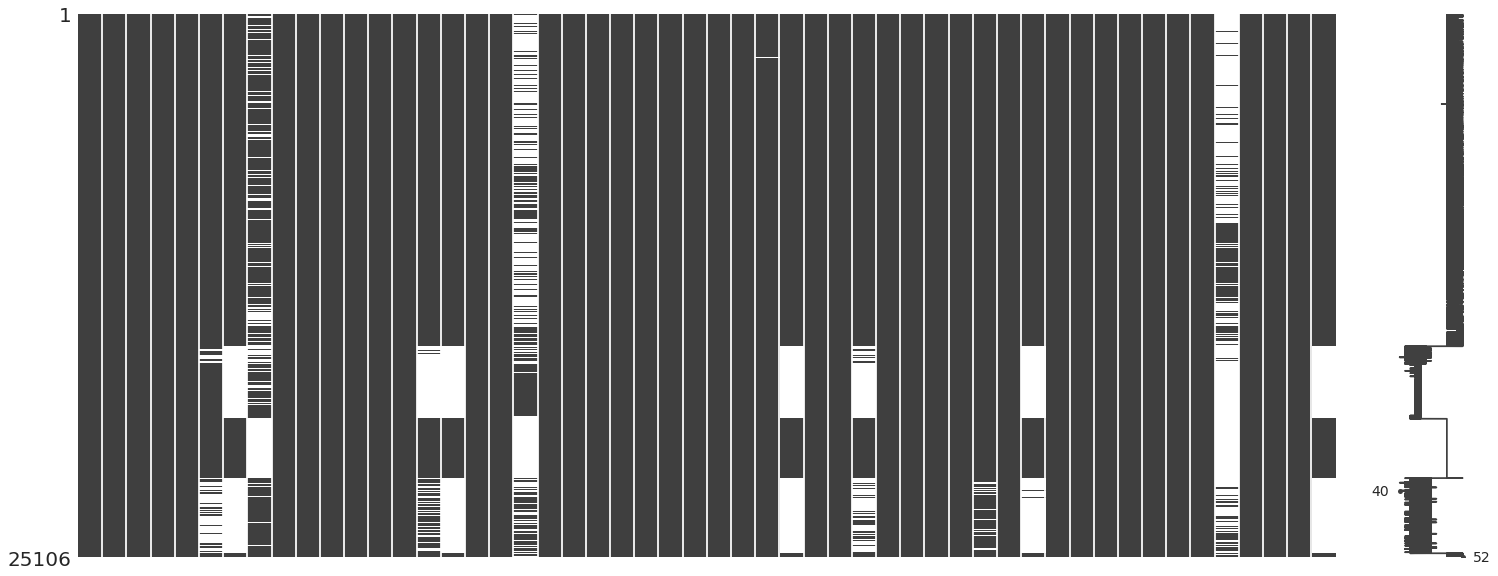

In [27]:
msno.matrix(full)

plot missing values for each target

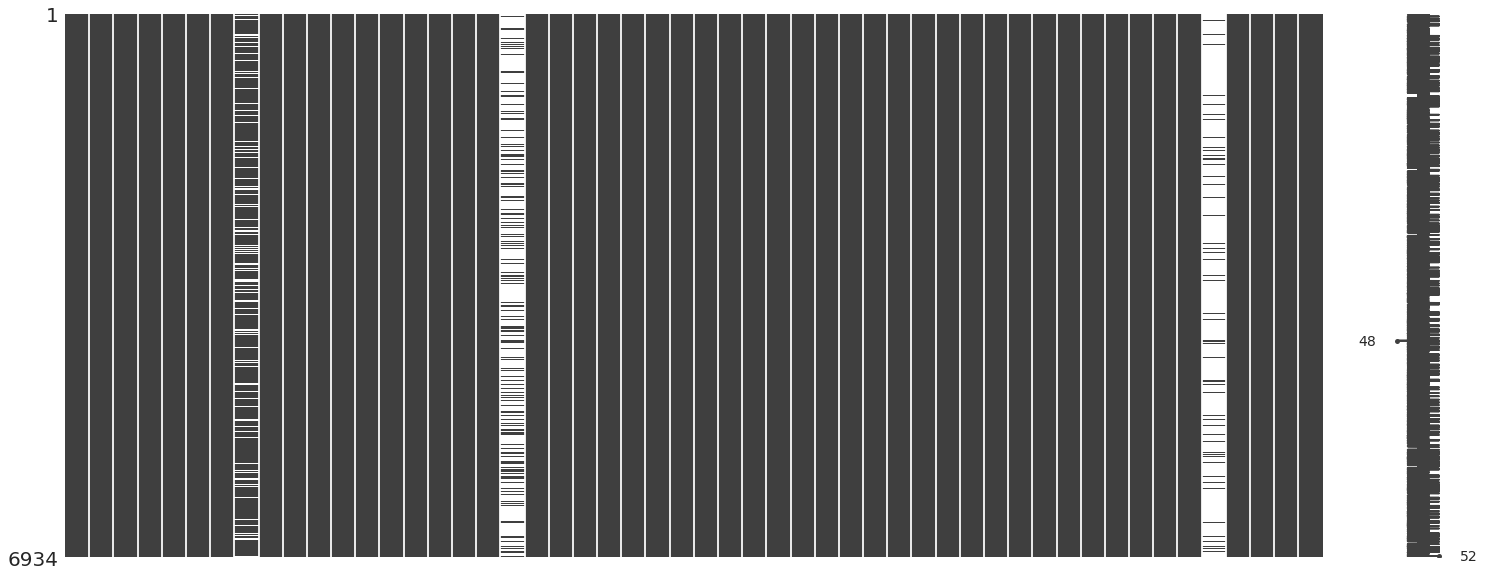

In [28]:
msno.matrix(full[full.target==0])

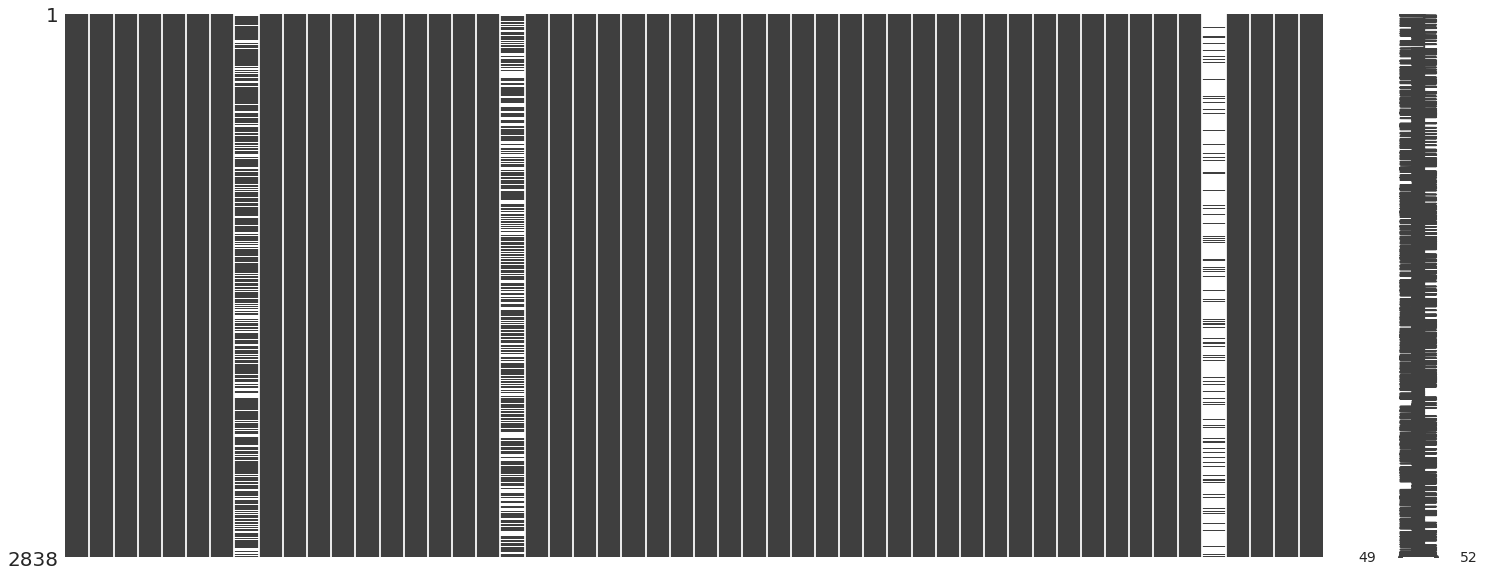

In [29]:
msno.matrix(full[full.target==1])

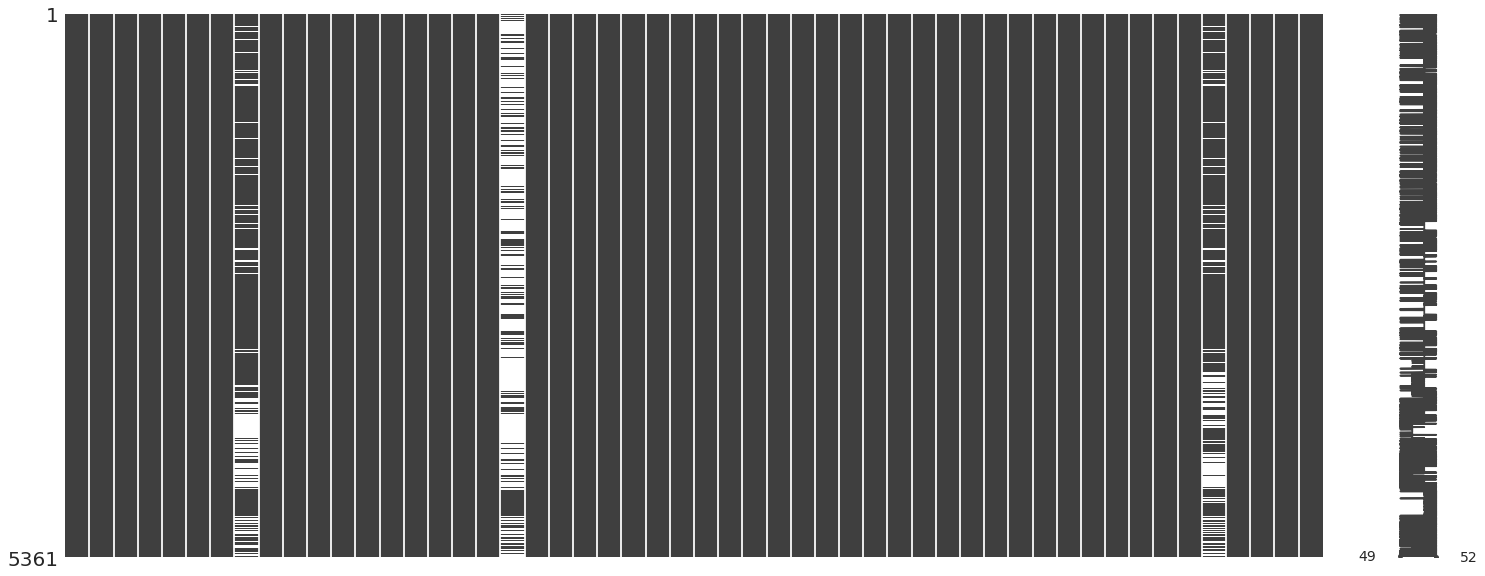

In [30]:
msno.matrix(full[full.target==2])

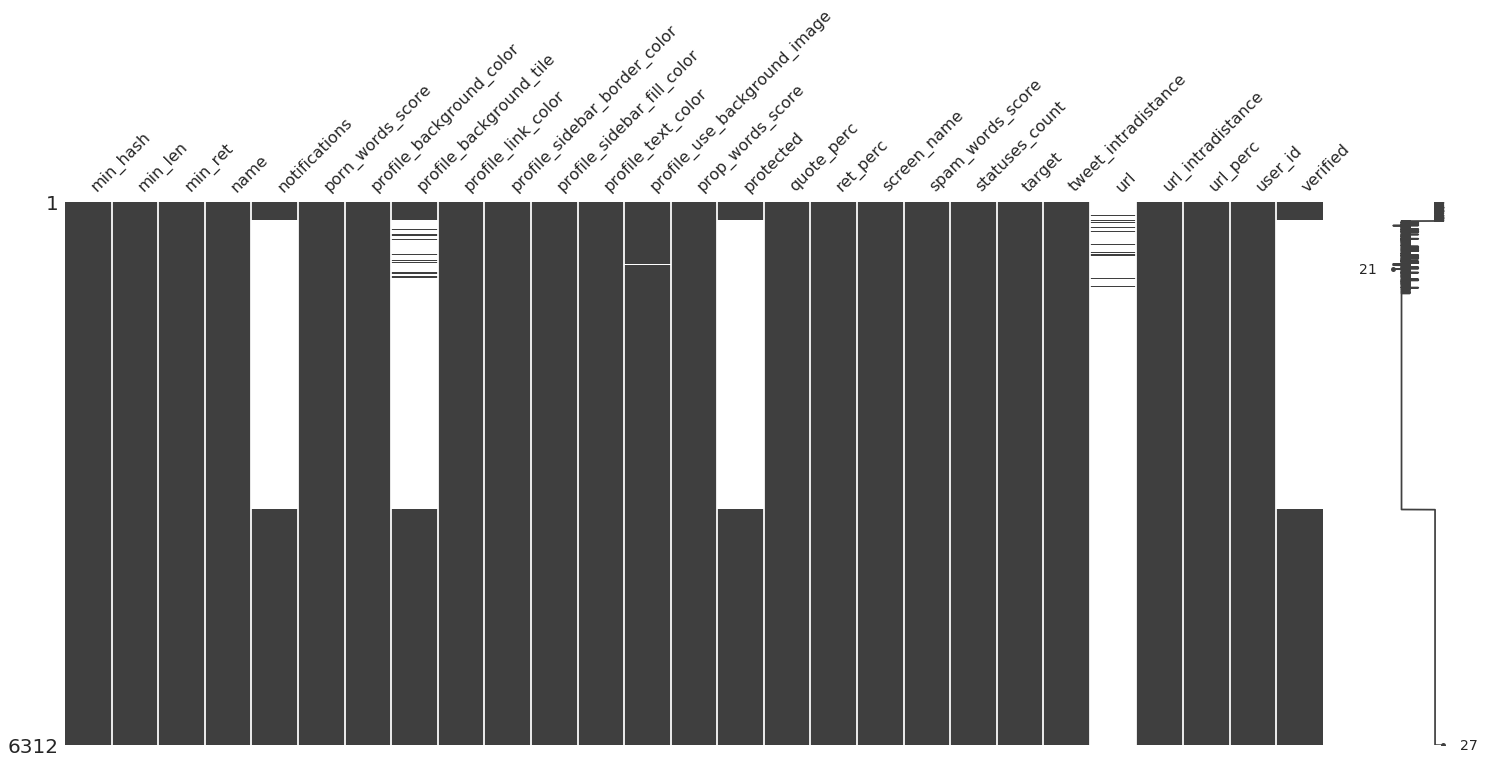

In [33]:
msno.matrix(full[full.target==3][features[25:]])

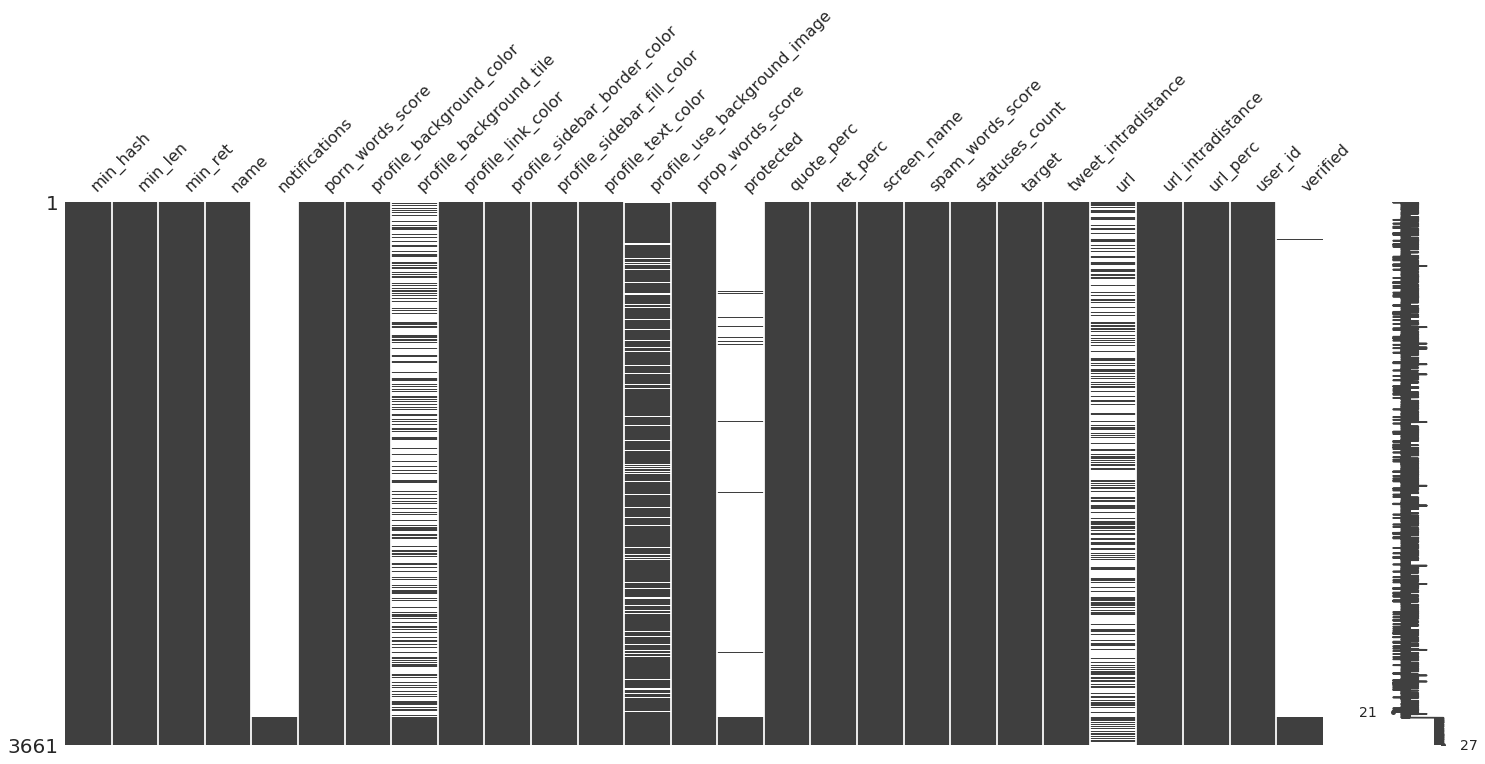

In [35]:
msno.matrix(full[full.target==4][features[25:]])

Remove features with too many missing values for some target

In [36]:
full = full.drop(columns=['default_profile_image','is_translator', 'geo_enabled', 'location', 'notifications', 'profile_background_tile', 'protected', 'verified'])

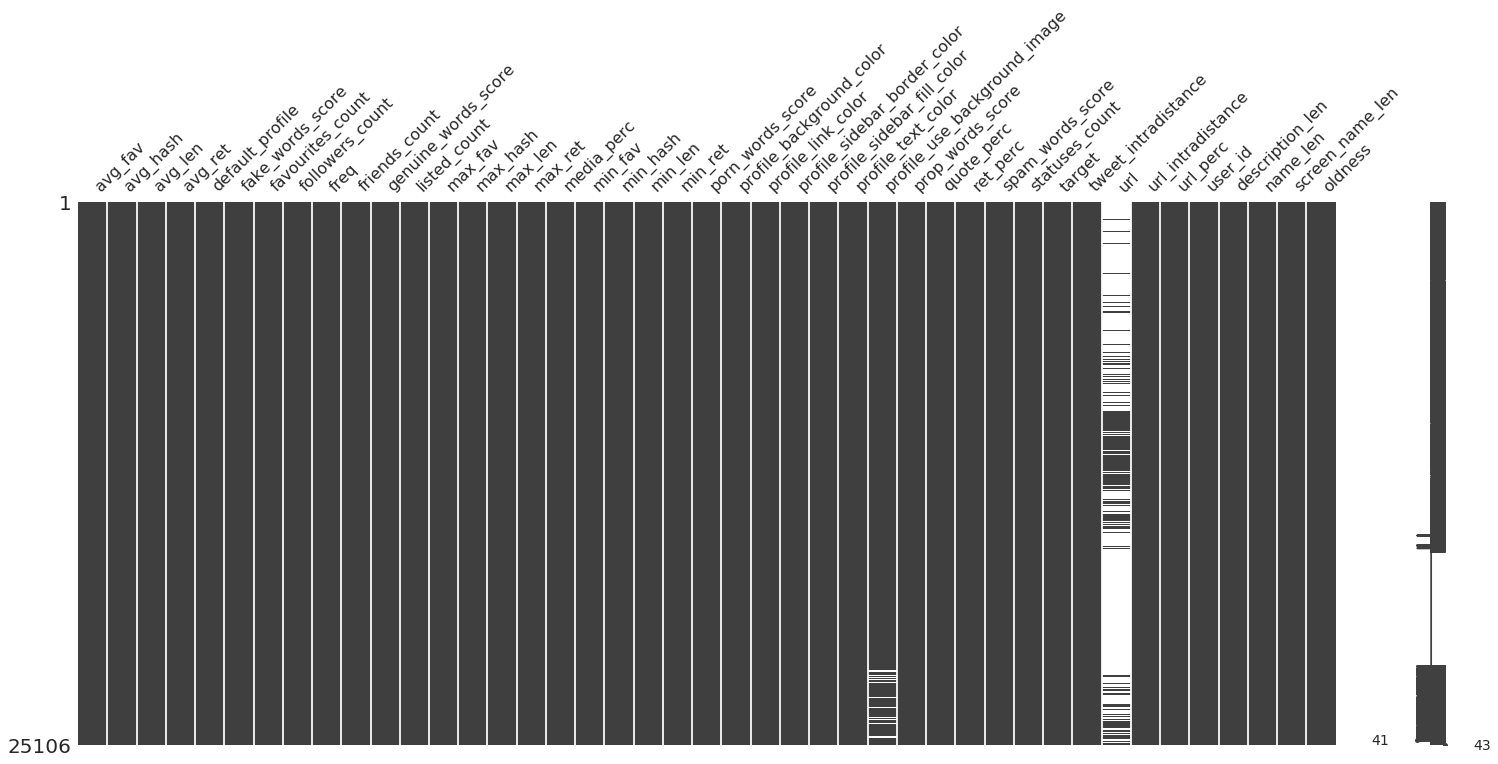

In [119]:
msno.matrix(full)

In [41]:
full.default_profile.value_counts()

1.0    15776
0.0     6571
Name: default_profile, dtype: int64

In [44]:
full[full.target==3].default_profile.value_counts()

1.0    5955
0.0      40
Name: default_profile, dtype: int64

In [45]:
full[full.target==4].default_profile.value_counts()

1.0    1125
0.0      94
Name: default_profile, dtype: int64

In [46]:
full['default_profile'] = full['default_profile'].fillna(full['default_profile'].mode()[0])

In [49]:
full['description'] = full['description'].fillna('')

In [54]:
full['description_len'] = full['description'].apply(lambda x: len(x))

In [65]:
full = full.drop(columns=['description'])

In [67]:
full['name'] = full['name'].fillna('')

In [69]:
full['name_len'] = full['name'].apply(lambda x: len(x))

In [70]:
full = full.drop(columns=['name'])

In [93]:
full['screen_name'] = full['screen_name'].fillna('')

In [94]:
full['screen_name_len'] = full['screen_name'].apply(lambda x: len(x))

In [95]:
full = full.drop(columns=['screen_name'])

In [73]:
full = full.drop(columns=['lang'])

In [88]:
2018 - int(full.created_at[1][:4])

8

In [114]:
def oldness(x):
    if x[0] == '2':
        return 2018 - int(x[:4])
    else:
        return 2018 - int(x[-4:])

In [115]:
full['oldness'] = full['created_at'].apply(lambda x: oldness(x))

In [118]:
full = full.drop(columns=['created_at'])